# calculate probabilities and compare to IFS

In [46]:
import numpy as np
import pdb

def MAD(x):
    return np.median(np.abs(x - np.median(x)))

def shallow_lex_prob(fit,ep_lex=False):
    """get shallow lex probability"""
    # fit: n x t matrix of fitness values
    T = np.arange(fit.shape[1]) # cases
    N = np.arange(fit.shape[0]) # pop
    P = np.zeros(len(N))
    min_fit = np.empty(len(T))
    epsilon = np.zeros(len(T))
#     pdb.set_trace()
    for t in T: # test cases
        # minimum fitness in population on case t
        min_fit[t] = np.min([fit[n,t] for n in N]) 
        # if using epsilon lexicase, get epsilon
        if ep_lex:
            epsilon[t] = MAD([fit[n,t] for n in N])

        # count elite cases
        for n in N: # population
           # check elitism and increase probability if n is elite on t
            if fit[n,t] <= min_fit[t] + epsilon[t]:
                P[n] += 1
    P = P/sum(P) # normalize probabilities to sum to 1
    return P

def IFS_prob(fit):
    """get IFS probability"""
#     T = np.arange(fit.shape[1]) # cases
    N = np.arange(fit.shape[0]) # pop
    P = np.zeros(len(N))
    #normalize fitness
#     fit_norm = fit/np.sum(fit,axis=1)
    fit_sum = np.sum(fit,axis=0)
#     print('fit_sum shape:',fit_sum.shape)
#     print('fit_sum shape:',fit_sum.shape)
    for n in N:
        P[n] = np.sum([f/fit_sum[t] for t,f in enumerate(fit[n,:])])
#         print('P[n]:',P[n])
    return P/sum(P)

## test probablities on boolean semantics

fit shape: (100, 200)
sum P_lex: 1.0
min P_lex: 0.00852472169291
max P_lex: 0.0118343195266
mean P_lex: 0.01
sum P_ifs: 1.0
min P_ifs: 0.00852330404428
max P_ifs: 0.0119082630161
mean P_ifs: 0.01


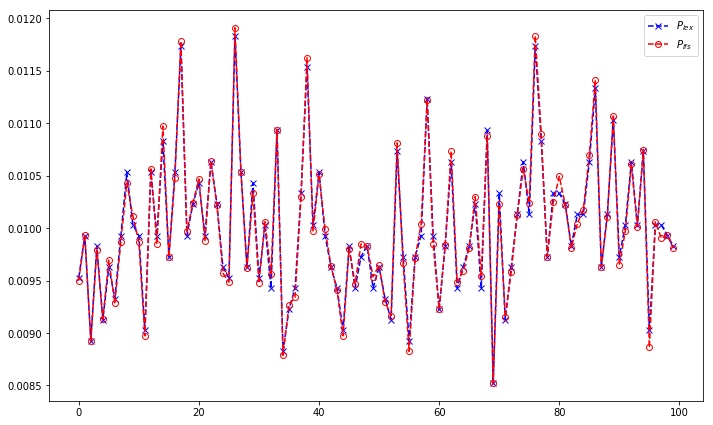

In [70]:
fit = np.asarray(np.random.rand(100, 200) < 0.5,dtype='float')
print('fit shape:',fit.shape)
N = np.arange(fit.shape[0])

P_lex = shallow_lex_prob(fit)
print('sum P_lex:',np.sum(P_lex))
print('min P_lex:',np.min(P_lex))
print('max P_lex:',np.max(P_lex))
print('mean P_lex:',np.mean(P_lex))

P_ifs = IFS_prob(1-fit)
print('sum P_ifs:',np.sum(P_ifs))
print('min P_ifs:',np.min(P_ifs))
print('max P_ifs:',np.max(P_ifs))
print('mean P_ifs:',np.mean(P_ifs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(N,P_lex,'--xb',label="$P_{lex}$")
plt.plot(N,P_ifs,'--or',markerfacecolor='none',label="$P_{ifs}$")
plt.legend()
plt.tight_layout()
plt.gcf().savefig('IFS_shallow_lex_comparison_bool.png',figsize=(20,12))
plt.show()

## test probablities on floating point semantics

fit shape: (100, 200)
sum P_lex: 1.0
min P_lex: 0.0
max P_lex: 0.04
mean P_lex: 0.01
sum P_ifs: 1.0
min P_ifs: 0.00895544389589
max P_ifs: 0.010819915674
mean P_ifs: 0.01


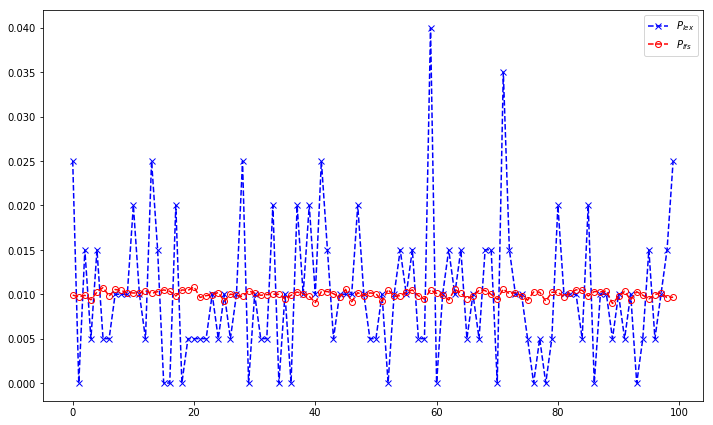

In [69]:
fit = np.asarray(np.random.rand(100, 200),dtype='float')
print('fit shape:',fit.shape)
N = np.arange(fit.shape[0])

P_lex = shallow_lex_prob(fit)
print('sum P_lex:',np.sum(P_lex))
print('min P_lex:',np.min(P_lex))
print('max P_lex:',np.max(P_lex))
print('mean P_lex:',np.mean(P_lex))

P_ifs = IFS_prob(1-fit)
print('sum P_ifs:',np.sum(P_ifs))
print('min P_ifs:',np.min(P_ifs))
print('max P_ifs:',np.max(P_ifs))
print('mean P_ifs:',np.mean(P_ifs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))

plt.plot(N,P_lex,'--xb',label="$P_{lex}$")
plt.plot(N,P_ifs,'--or',markerfacecolor='none',label="$P_{ifs}$")
plt.legend()
plt.tight_layout()
plt.gcf().savefig('IFS_shallow_lex_comparison_float.png',figsize=(20,12))
plt.show()

## test probablities on floating point semantics with epsilon

fit shape: (100, 200)
sum P_lex: 1.0
min P_lex: 0.00677966101695
max P_lex: 0.0133599202393
mean P_lex: 0.01
sum P_ifs: 1.0
min P_ifs: 0.00884920752166
max P_ifs: 0.0112999355309
mean P_ifs: 0.01


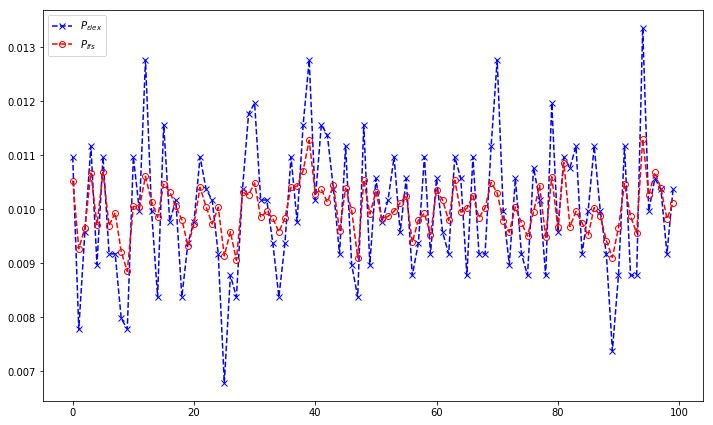

In [68]:
fit = np.asarray(np.random.rand(100, 200),dtype='float')
print('fit shape:',fit.shape)
N = np.arange(fit.shape[0])

P_lex = shallow_lex_prob(fit,ep_lex=True)
print('sum P_lex:',np.sum(P_lex))
print('min P_lex:',np.min(P_lex))
print('max P_lex:',np.max(P_lex))
print('mean P_lex:',np.mean(P_lex))

P_ifs = IFS_prob(1-fit)
print('sum P_ifs:',np.sum(P_ifs))
print('min P_ifs:',np.min(P_ifs))
print('max P_ifs:',np.max(P_ifs))
print('mean P_ifs:',np.mean(P_ifs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(N,P_lex,'--xb',label="$P_{\epsilon lex}$")
plt.plot(N,P_ifs,'--or',markerfacecolor='none',label="$P_{ifs}$")

plt.legend()
plt.tight_layout()
plt.gcf().savefig('IFS_shallow_lex_comparison_epsilon.png',figsize=(20,12))
plt.show()

## compare correlations of selection methods

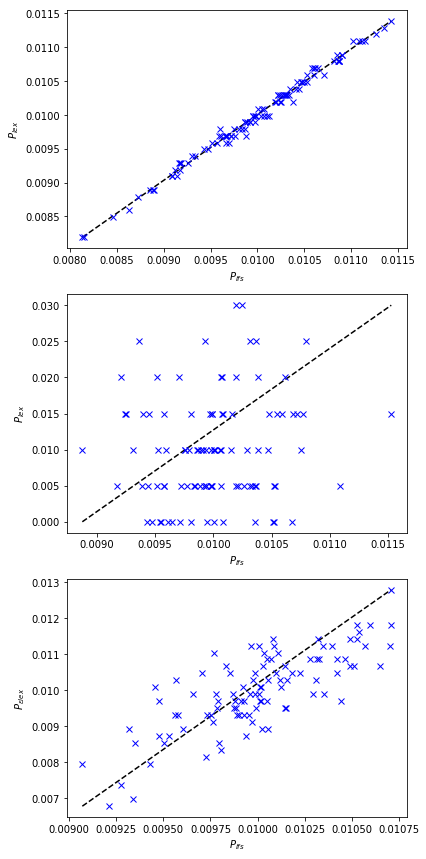

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(3,figsize=(6,12))
# boolean
fit = np.asarray(np.random.rand(100, 200)<0.5,dtype='float')
P_lex = shallow_lex_prob(fit)
P_ifs = IFS_prob(1-fit)
# -- plot
ax1.plot([np.min(P_ifs),np.max(P_ifs)],[np.min(P_lex),np.max(P_lex)],'--k')
ax1.plot(P_ifs,P_lex,'xb')
ax1.set_xlabel('$P_{ifs}$')
ax1.set_ylabel('$P_{lex}$')
# float
fit = np.asarray(np.random.rand(100, 200),dtype='float')
P_lex = shallow_lex_prob(fit)
P_ifs = IFS_prob(1-fit)
# -- plot
ax2.plot([np.min(P_ifs),np.max(P_ifs)],[np.min(P_lex),np.max(P_lex)],'--k')
ax2.plot(P_ifs,P_lex,'xb')
ax2.set_xlabel('$P_{ifs}$')
ax2.set_ylabel('$P_{lex}$')
# float with ep lex
fit = np.asarray(np.random.rand(100, 200),dtype='float')
P_lex = shallow_lex_prob(fit,ep_lex=True)
P_ifs = IFS_prob(1-fit)
# -- plot
ax3.plot([np.min(P_ifs),np.max(P_ifs)],[np.min(P_lex),np.max(P_lex)],'--k')
ax3.plot(P_ifs,P_lex,'xb')
ax3.set_xlabel('$P_{ifs}$')
ax3.set_ylabel('$P_{\epsilon lex}$')

f.tight_layout()
f.savefig('IFS_shallow_lex_comparison_corr.png',figsize=(20,12))
plt.show()